## Discriminator | Convolutional Neural Network

We use mnist dataset.

Assume that images of ONE are REAL(1), and those of SEVEN are FAKE(0).

We investigate whether a discriminator can distinguish ONE from SEVEN.

<img src="https://docs.google.com/uc?id=1XXmgT15DAbcN1tNI8OvefeTdq4cevU40" width="300"> <br/>

<img src="https://docs.google.com/uc?id=1gaPSSjsATGxhR87g9iEw4UVNcX0iF9Bk" width="700">


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day02/Practice06_Discriminator_CNN.ipynb)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist

from keras.layers import (
    Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape, MaxPooling2D)


from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU 
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model


pd.set_option('display.max_columns', 28)

In [ ]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)    

In [ ]:
def build_discriminator(img_shape):

    model = Sequential()
    model.add(Conv2D(  , kernel_size=3, strides=2, input_shape=img_shape, padding='same'))

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(  , kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    model.add(Conv2D(  , kernel_size=3, strides=2, padding='same'))

    #model.add(BatchNormalization())             

    model.add(LeakyReLU(alpha=0.01))            

    #model.add(MaxPooling2D(pool_size=2, strides=None, padding='valid'))

    model.add(Flatten())                        

    model.add(Dense(1, activation='sigmoid'))


    return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         256       
 ormalization)                                                   
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 7, 7, 64)          0         
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                      

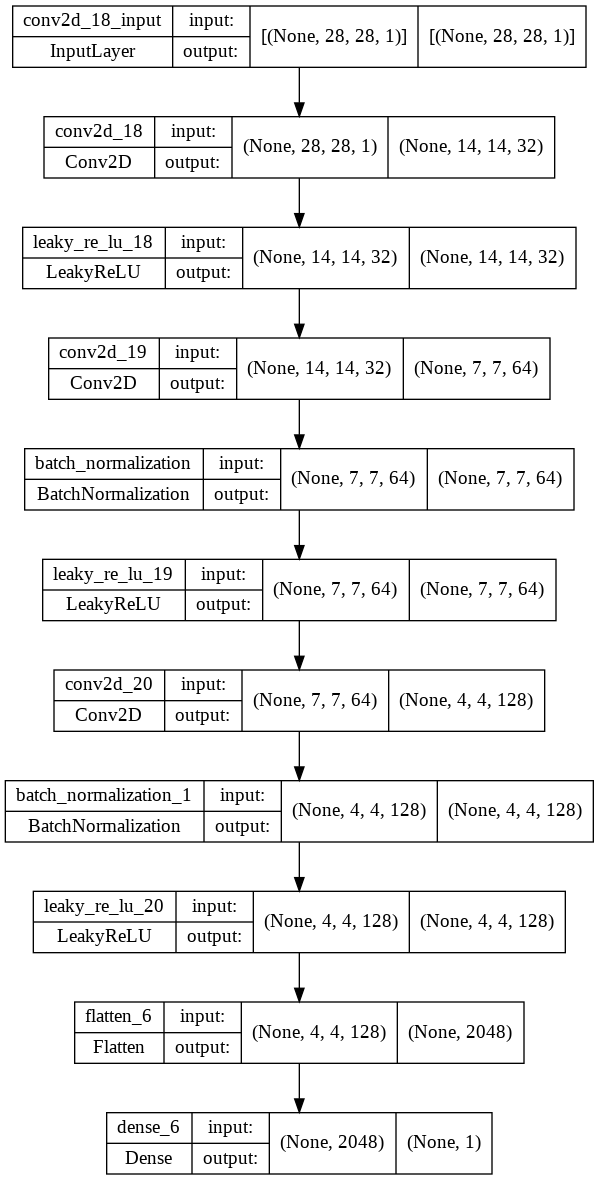

In [ ]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

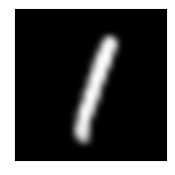

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 1
X_test = X_test[np.where(y_test==char)]  

show_img(X_test[1])

In [ ]:
#for i in range(28):
#  for j in range(28):
#    s = str(X_train[602][i][j])
#    s_ljust = s.rjust(4,'_')
#    print(s_ljust, end="")
#  
#  print("")
pd.DataFrame(X_test[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,254,107,3,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,227,254,254,9,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,254,254,165,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,203,254,254,73,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,254,254,250,0,0,0,0,0,0,0,0,0,0


In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(batch_size, sample_interval, n_epochs = 1):

    # Load the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    char = 1 #True image
    X_train_1 = X_train[np.where(y_train==char)]    

    char = 7 #Fake image
    X_train_7 = X_train[np.where(y_train==char)]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_1 = X_train_1 / 127.5 - 1.0
    X_train_7 = X_train_7 / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    #
    #bat_per_epo = int((X_train_1.shape[0] + X_train_7.shape[0]) / batch_size)
    half_batch = int(batch_size / 2)

    #print(bat_per_epo, half_batch )
    # Labels for real images: all ones
    real = np.ones((half_batch, 1))
    # Labels for fake images: all zeros
    fake = np.zeros((half_batch, 1))
    
    bat_per_epo = 10

    for i in range(n_epochs):
        for j in range(bat_per_epo):

          # -------------------------
          #  Train the Discriminator
          # -------------------------

          # Get a random batch of real images
          idx = np.random.randint(0, X_train_1.shape[0], half_batch)
          imgs = X_train_1[idx]

          # Get a random batch of fake images
          idx = np.random.randint(0, X_train_7.shape[0], half_batch)
          fake_img = X_train_7[idx]

          # Generate a batch of fake images　(random noize of [-1 1])
          #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
          #fake_img = np.zeros((batch_size, 28, 28)) -1.0
          #print(fake_img.shape)

          # Train Discriminator
          d_loss_real = discriminator.train_on_batch(imgs, real)
          d_loss_fake = discriminator.train_on_batch(fake_img , fake)
        # print(d_loss_real, d_loss_fake)
          d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


          if (i*10 +  j + 1) % sample_interval == 0 :

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(i*10 +  j + 1)

            # Output training progress
            print("Epoch:%d %d/%d [D loss: %f, acc.: %.2f%%]" %
                  (i + 1, j+1, bat_per_epo, d_loss, 100.0 * accuracy))
    
 

In [ ]:
discriminator.metrics_names

['loss', 'accuracy']

In [ ]:
# Set hyperparameters
batch_size = 128
sample_interval = 1

# Train the Discriminator for the specified number of iterations
train(batch_size, sample_interval)

Epoch:1 1/10 [D loss: 2.072261, acc.: 49.22%]
Epoch:1 2/10 [D loss: 0.222432, acc.: 91.41%]
Epoch:1 3/10 [D loss: 0.062062, acc.: 99.22%]
Epoch:1 4/10 [D loss: 0.145751, acc.: 95.31%]
Epoch:1 5/10 [D loss: 0.200836, acc.: 92.19%]
Epoch:1 6/10 [D loss: 0.125618, acc.: 94.53%]
Epoch:1 7/10 [D loss: 0.069940, acc.: 96.88%]
Epoch:1 8/10 [D loss: 0.023274, acc.: 99.22%]
Epoch:1 9/10 [D loss: 0.028016, acc.: 98.44%]
Epoch:1 10/10 [D loss: 0.079478, acc.: 96.09%]


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 1 #True image: A label for 1 is "1"
X_test_1 = X_test[np.where(y_test==char)]    
y_test_1 = y_test[np.where(y_test==char)]  
y_test_1 = np.ones((y_test_1.shape[0], 1))

char = 7 #Fake image: A label for 7 is "0"
X_test_7 = X_test[np.where(y_test==char)]  
y_test_7 = y_test[np.where(y_test==char)]  
y_test_7 = np.zeros((y_test_7.shape[0], 1))



In [ ]:
_, accuracy = discriminator.evaluate(X_test_1, y_test_1)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

36/36 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 0.9982
Training Accuracy: 99.82%


In [ ]:
_, accuracy = discriminator.evaluate(X_test_7, y_test_7)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

33/33 [==============================] - 0s 7ms/step - loss: 0.9383 - accuracy: 0.9300
Training Accuracy: 93.00%


0 

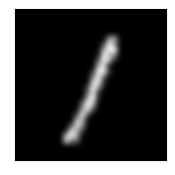

1 

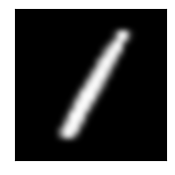

2 

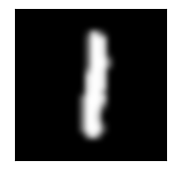

3 

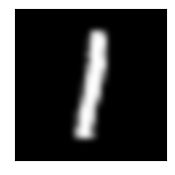

4 

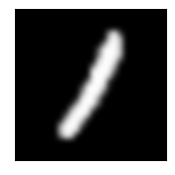

5 

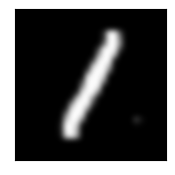

6 

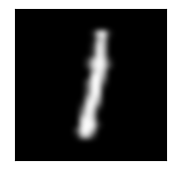

7 

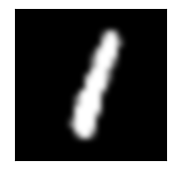

8 

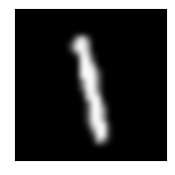

9 

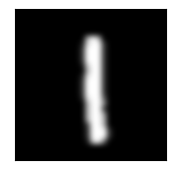

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(array([], dtype=int64), array([], dtype=int64))
0 

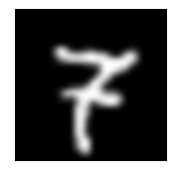

1 

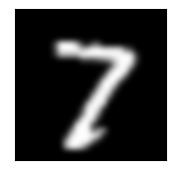

2 

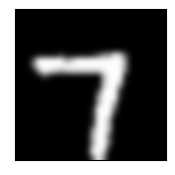

3 

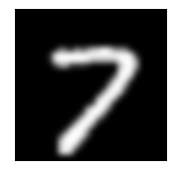

4 

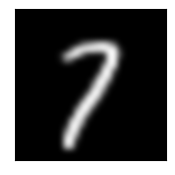

5 

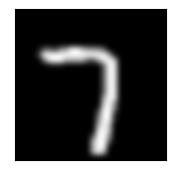

6 

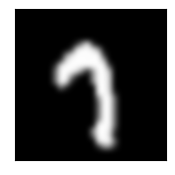

7 

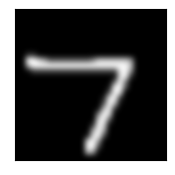

8 

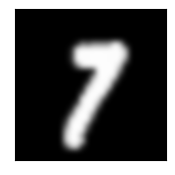

9 

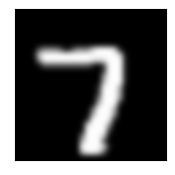

[[1.7407507e-02]
 [1.5458365e-24]
 [7.5394943e-26]
 [7.1967572e-27]
 [1.0000000e+00]
 [9.6614742e-23]
 [2.7984457e-15]
 [2.9019137e-19]
 [1.0000000e+00]
 [3.6320417e-30]]
(array([4, 8]), array([0, 0]))


In [ ]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) = mnist.load_data()
char = 1 #True image
X_test_1 = X_test[np.where(y_test==char)]    

char = 7 #Fake image
X_test_7 = X_test[np.where(y_test==char)]  

test_size = 10

#### test 1: real image
idx = np.random.randint(0, X_test_1.shape[0], test_size)
imgs_1 = X_test_1[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_1[i])

y = discriminator.predict(imgs_1)
print(y)

false = np.where(y<=0.5)
print(false)


#### test 7: fake image
idx = np.random.randint(0, X_test_7.shape[0], test_size)
imgs_7 = X_test_7[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_7[i])

y = discriminator.predict(imgs_7)
print(y)
false = np.where(y>=0.5)
print(false)

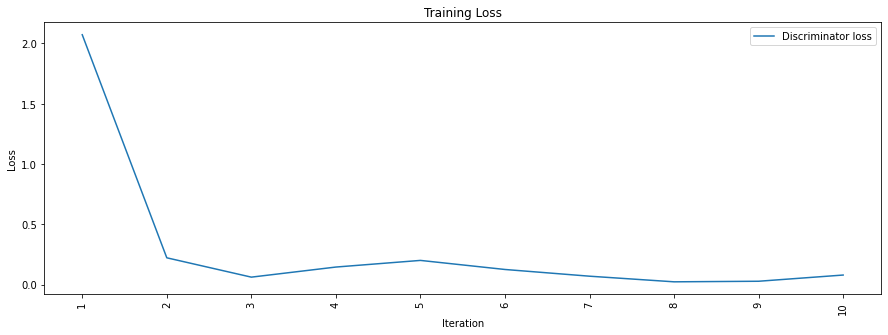

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()